In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
n_pts = 500
X,y = datasets.make_circles(n_samples = n_pts,random_state=123 , noise = 0.1, factor = 0.2)
#print(X)
#print(y)

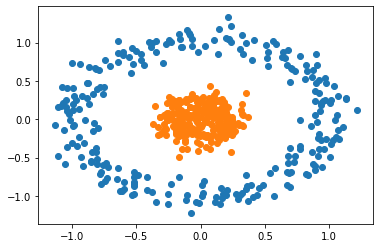

In [4]:
plt.scatter(X[y==0, 0],X[y==0, 1])

plt.scatter(X[y==1, 1],X[y==1, 0])


In [5]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [6]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs=200, shuffle ='true')

Epoch 1/200
500/500 [==============================] - 0s 611us/step - loss: 0.7033 - accuracy: 0.5760
Epoch 2/200
500/500 [==============================] - 0s 76us/step - loss: 0.6966 - accuracy: 0.5140
Epoch 3/200
500/500 [==============================] - 0s 80us/step - loss: 0.6957 - accuracy: 0.5740
Epoch 4/200
500/500 [==============================] - 0s 80us/step - loss: 0.6943 - accuracy: 0.4880
Epoch 5/200
500/500 [==============================] - 0s 78us/step - loss: 0.6940 - accuracy: 0.3820
Epoch 6/200
500/500 [==============================] - 0s 80us/step - loss: 0.6952 - accuracy: 0.5420
Epoch 7/200
500/500 [==============================] - 0s 90us/step - loss: 0.6926 - accuracy: 0.5400
Epoch 8/200
500/500 [==============================] - 0s 86us/step - loss: 0.6918 - accuracy: 0.5320
Epoch 9/200
500/500 [==============================] - 0s 88us/step - loss: 0.6916 - accuracy: 0.4740
Epoch 10/200
500/500 [==============================] - 0s 77us/step - loss: 0.69

Text(0.5, 1.0, 'accuracy')

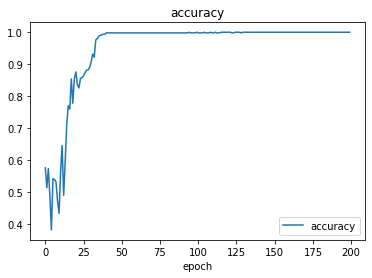

In [7]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')


Text(0.5, 0, 'epoch')

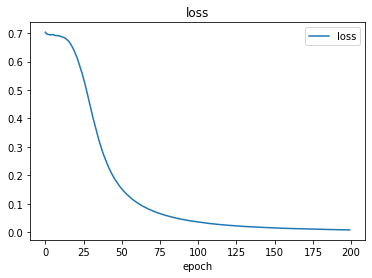

In [8]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [9]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25 , 50)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

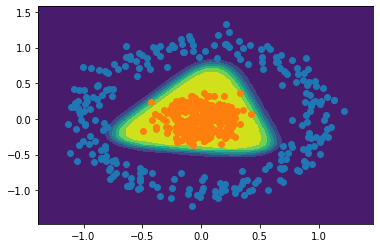

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


Prediction is:  [[0.40565538]]


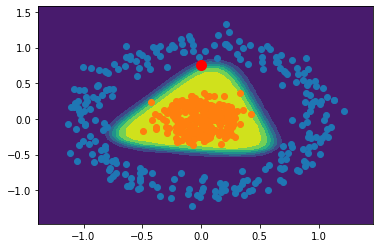

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

x = 0
y = 0.75

point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)